neff の順序: ComplexF64[3.2201282940182088 + 0.0im, 3.154263590792549 + 0.0im, 3.0962831677761167 + 0.0im, 3.0454491439409166 + 0.0im, 3.0314440977096555 + 0.0im]
有効屈折率が小さい順のインデックス: [5, 4, 3, 2, 1]
x size: (201,)
y size: (101,)
index size: (101, 201)
epsilon size: (101, 201)
hx size: (102, 202, 5)
hy size: (102, 202, 5)
neff size: (5,)
Expanded x size: (202,)
Expanded y size: (102,)


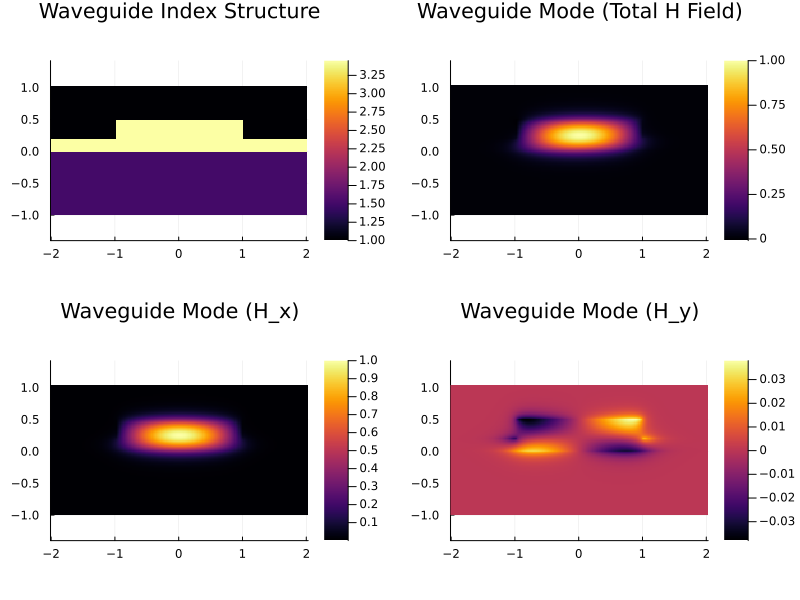

In [1]:
import WGMODES
import Plots

lambda = 1.55 # 波長は基本波とSH光の二倍の波長を指定する saohbofdahbidaadfoibhnadfn
dx = dy = 0.02
x = -2:dx:2
y = -1:dy:1

# これがmatlabならwaveguidemeshfullで導出できるらしい
index = [y < 0 ? 1.5 : (y < 0.2 || (y < 0.5 && abs(x) < 1) ? 3.45 : 1.0) for y = y, x = x]
epsilon = index .^ 2
guess = maximum(index)
nmodes = 5
boundary = "0000" # これは固定でいいらしい

# モード数を指定（例として1）
mode = 1

hx, hy, neff = WGMODES.wgmodes(lambda, guess, nmodes, dx, dy, epsilon, boundary);

# neff の順序を確認する
println("neff の順序: ", neff)

# モードの順序が有効屈折率に基づいているか確認
sorted_indices = sortperm(abs.(neff))  # 有効屈折率を昇順にソート
println("有効屈折率が小さい順のインデックス: ", sorted_indices)

# x, yのサイズを確認
println("x size: ", size(x))  # 一次元配列のサイズ
println("y size: ", size(y))  # 一次元配列のサイズ

# indexとepsilonのサイズを確認
println("index size: ", size(index))  # 二次元配列のサイズ
println("epsilon size: ", size(epsilon))  # 二次元配列のサイズ

# hx, hyのサイズを確認（これは三次元配列のはず）
println("hx size: ", size(hx))  # 三次元配列のサイズ
println("hy size: ", size(hy))  # 三次元配列のサイズ

# neffのサイズを確認
println("neff size: ", size(neff))  # 一次元配列のサイズ

# メッシュを広げた後の x, y のサイズ確認
x = [x; x[end] + dx]
y = [y; y[end] + dy]
println("Expanded x size: ", size(x))
println("Expanded y size: ", size(y))

# プロット
Plots.plot(
    Plots.heatmap(x, y, index,
        title="Waveguide Index Structure",
        aspectratio=1,
    ),
    Plots.heatmap(x, y, real.(hx[:, :, mode] .+ hy[:, :, mode]), # hx[:, :, 1] の1はnmodesの1番目のモードを表している
        title="Waveguide Mode (Total H Field)",
        aspectratio=1,
    ),
    Plots.heatmap(x, y, real.(hx[:, :, mode]),
        title="Waveguide Mode (H_x)",
        aspectratio=1,
    ),
    Plots.heatmap(x, y, real.(hy[:, :, mode]),
        title="Waveguide Mode (H_y)",
        aspectratio=1,
    ),
    size=(800, 600),
)


磁界分布の観察結果に基づくと、次のことが推測されます：

- **H_x が中心に向かって明るく、外側に向かって暗くなっている**：これは、光導波路の基本モードでよく見られる特徴です。特に、**TE₀モード**では、伝搬方向に対して電場が横方向に広がり、導波路のコア部分に強く閉じ込められるため、**Hx** の分布が中心付近で強くなります。これが、あなたが観察した「中心が明るく、外側が暗くなる」現象に対応します。

- **H_y がほとんどゼロ付近**：これは、典型的な**TEモード**の特徴です。TEモードでは、磁界の $ H_y $ 成分はほとんど存在しないか、非常に小さいため、H_y が明確に現れないことが多いです。特に、基本モード (TE₀) では、**Hx** が主な成分で、**Hy** はほとんど寄与しません。

### 推測されるモード

この観察結果から、以下のことが推測されます：

1. **H_x が中心で強いこと**、**H_y がほとんどゼロであること**は、**TE₀モード**の特徴に合致します。
   - TE₀モードでは、横方向の電場成分 $ E_x $ が主に存在し、磁場成分としては $ H_x $ が強く、$ H_y $ はほとんどありません。
   - Hx の分布が中心で強くなるのは、コアに電磁波が閉じ込められている典型的な導波路のモードプロファイルです。

2. **TMモード**の場合、磁界分布では $ H_y $ が主に寄与し、$ H_x $ は小さくなりますが、今回の観察では $ H_y $ がほとんどゼロなので、**TMモードである可能性は低い**です。

### 結論

- あなたが観察した磁界分布は、**TE₀モード**である可能性が非常に高いです。
- **Hx が中心で強く**、**Hy がほとんどゼロに近い**という特徴は、典型的な**TE₀モード**の磁界分布に一致します。

これで、TE₀モードであることが確認できたと考えられます。もしさらに詳細な解析が必要であれば、電界成分の確認も行うことができますが、現時点の情報からは**TE₀モード**であると考えて間違いないでしょう。

Cropped hx size: (101, 201)
Cropped hy size: (101, 201)
Ex size: (101, 201)
Ey size: (101, 201)


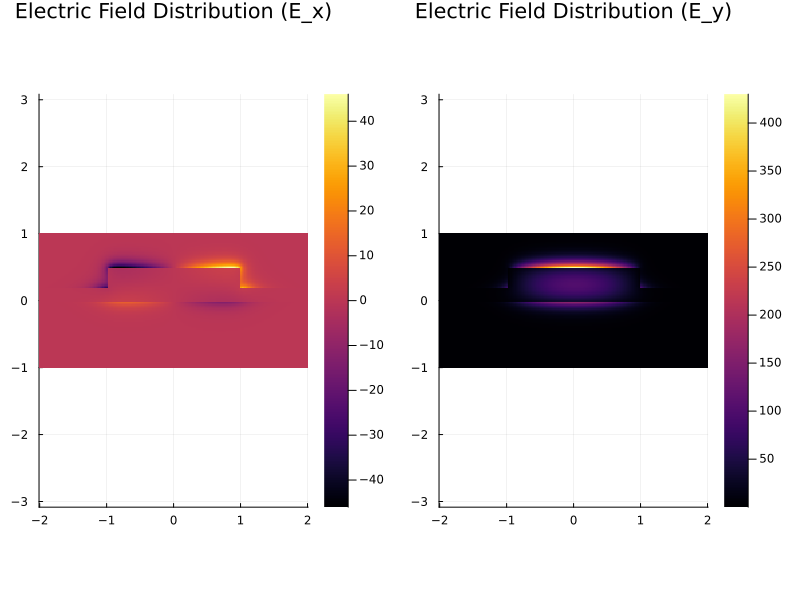

In [11]:
# hx と hy をクロップ（余分な行と列を削除）
hx_cropped = hx[1:end-1, 1:end-1, mode]
hy_cropped = hy[1:end-1, 1:end-1, mode]

# サイズを確認
println("Cropped hx size: ", size(hx_cropped))  # (101, 201)
println("Cropped hy size: ", size(hy_cropped))  # (101, 201)

# 必要な定数を定義
epsilon0 = 8.854e-12  # 真空の誘電率 [F/m]
c = 3e8  # 光速 [m/s]
omega = 2 * pi * c / lambda  # 角周波数 [rad/s]
beta = neff[1] * (2 * pi / lambda)  # 伝搬定数 [rad/m]

# 相対誘電率から絶対誘電率を計算
epsilon_point_matrix = epsilon_r * epsilon0  # サイズ (101, 201)

# Ex と Ey を計算
Ex = (beta ./ (omega .* epsilon_point_matrix)) .* hy_cropped
Ey = (beta ./ (omega .* epsilon_point_matrix)) .* hx_cropped

# サイズを確認
println("Ex size: ", size(Ex))  # (101, 201)
println("Ey size: ", size(Ey))  # (101, 201)

# プロット用の x, y を元のサイズに戻す
x_plot = x[1:end-1]
y_plot = y[1:end-1]

# プロット
Plots.plot(
    Plots.heatmap(x_plot, y_plot, real.(Ex),
        title="Electric Field Distribution (E_x)",
        aspectratio=1,
    ),
    Plots.heatmap(x_plot, y_plot, real.(Ey),
        title="Electric Field Distribution (E_y)",
        aspectratio=1,
    ),
    size=(800, 600),
)


以上のコードは電界成分 $ E_x $ と $ E_y $ を磁界成分 $ H_x $ と $ H_y $ から計算するためのもので、正しいと思われます。以下に、コードで行っている内容を Jupyter Notebook の Markdown セルとしてまとめます。

---

# 電界分布の計算

## 定数の定義

- **光速** $ c_0 = 299,792,458 \, \text{m/s} $
- **真空の透磁率** $ \mu_0 = 4\pi \times 10^{-7} \, \text{H/m} $
- **真空の誘電率**
  $$
  \epsilon_0 = \frac{1}{\mu_0 c_0^2}
  $$
  
## 角周波数と伝搬定数の計算

- **角周波数**
  $$
  \omega = \frac{2\pi c_0}{\lambda}
  $$
- **真空中の波数**
  $$
  k_0 = \frac{2\pi}{\lambda}
  $$
- **伝搬定数**
  $$
  \beta = n_{\text{eff}}[1] \times k_0
  $$
  ここで、$ n_{\text{eff}}[1] $ は最初のモードの有効屈折率です。

## 電界成分の計算

電磁波の基本式から、磁界成分から電界成分を計算します。ここでは $ H_z $ は無視できると仮定しています。

- **位置ごとの誘電率**
  $$
  \epsilon = \epsilon_r \epsilon_0
  $$
  ここで、$ \epsilon_r $ は各点での相対誘電率です。

- **電界成分の計算式**
  $$
  E_x = \frac{\beta}{\omega \epsilon} H_y
  $$
  $$
  E_y = \frac{\beta}{\omega \epsilon} H_x
  $$
  
## コードの処理手順

1. **電界配列の初期化**

   $ E_x $ と $ E_y $ を $ H_x $ や $ H_y $ と同じサイズで初期化します。

2. **電界成分の計算ループ**

   各位置 $ (i, j) $ について以下を行います:

   - **誘電率の取得**
     $$
     \epsilon_{\text{point}} = \epsilon_r[i, j] \times \epsilon_0
     $$
   - **電界成分の計算**
     - $ H_y $ から $ E_x $ を計算:
       $$
       E_x[i, j] = \frac{\beta}{\omega \epsilon_{\text{point}}} H_y[i, j, 1]
       $$
     - $ H_x $ から $ E_y $ を計算:
       $$
       E_y[i, j] = \frac{\beta}{\omega \epsilon_{\text{point}}} H_x[i, j, 1]
       $$

3. **電界分布のプロット**

   計算した $ E_x $ と $ E_y $ の実数部をヒートマップとして描画します。

---

## 注意点

- **境界条件の確認**: 配列のサイズを考慮して、インデックスが範囲外にならないように注意しています。
- **近似**: $ H_z $ が無視できると仮定しています。この仮定が成り立つかどうか、物理的な状況に応じて確認する必要があります。

## 結論

このコードは、磁界成分から電界成分を計算し、電界分布を可視化するためのものです。電磁波の基本原理に基づいており、計算手法も正しいと考えられます。

用語が多くて混乱することがありますね。ここで、`index`、`epsilon`、`epsilon_r`、および `epsilon0` の関係を整理して、数式で説明します。

### 1. `index` とは？
`index` は屈折率 $ n $ を表します。屈折率はそのまま光の速度が物質中でどれだけ遅くなるかを示す値です。したがって、`index` 配列には各点の屈折率が格納されています。

### 2. `epsilon` とは？
`epsilon` は **誘電率** $ \epsilon_r $ を表します。屈折率と誘電率は次の関係があります：

$$
n^2 = \epsilon_r
$$

つまり、屈折率 $ n $ の2乗はその場所の相対誘電率 $ \epsilon_r $ に対応します。Julia のコードにおける `index` は屈折率 $ n $ なので、これを2乗することで相対誘電率 $ \epsilon_r $ が得られます。すなわち：

$$
\epsilon_r = \texttt{index} .^ 2
$$

### 3. `epsilon0` とは？
`epsilon0` は真空の誘電率、つまり **真空誘電率** を表します。定数として以下のような値を持ちます：

$$
\epsilon_0 = 8.854 \times 10^{-12} \, \text{F/m}
$$

これは真空中の電場と電気的な応答の関係を表す物理定数です。

### 4. `epsilon_point` とは？
`epsilon_point` は、**絶対誘電率** $ \epsilon $ を表す値です。相対誘電率 $ \epsilon_r $ に真空の誘電率 $ \epsilon_0 $ を掛けたものが絶対誘電率 $ \epsilon $ です。

$$
\epsilon = \epsilon_r \cdot \epsilon_0
$$

したがって、Julia のコードにおける `epsilon_point_matrix` は、各点の絶対誘電率を示します。

### まとめると：

1. **屈折率** $ n $：
   - `index` = $ n $

2. **相対誘電率** $ \epsilon_r $：
   - `epsilon_r` = `index .^ 2` = $ n^2 $

3. **真空の誘電率** $ \epsilon_0 $：
   - 定数 `epsilon0` = $ \epsilon_0 $

4. **絶対誘電率** $ \epsilon $：
   - `epsilon_point` = `epsilon_r * epsilon0` = $ \epsilon_r \cdot \epsilon_0 $ = $ n^2 \cdot \epsilon_0 $

### 最終的な数式の流れ：

1. **屈折率** `index` から相対誘電率 `epsilon_r` を計算：
   $$
   \epsilon_r = \texttt{index}^2
   $$

2. **絶対誘電率** `epsilon_point` の計算：
   $$
   \epsilon = \epsilon_r \cdot \epsilon_0 = \texttt{index}^2 \cdot \epsilon_0
   $$

これで、`index`、`epsilon`、`epsilon0`、`epsilon_r` の関係が整理できたと思います。

## まとめ

- E_xとかE_yはEのx成分の強さ、Eのy成分の強さ
- ２つ合わせるとベクトルであり、電解分布はベクトル場であることがわかる
- 電磁波の進行方向に対して電界や磁界は垂直になるので、導波路にそってz方向にすすむ電磁波ではH_zやE_zは0だと思っていい

## 疑問点

- H_x, H_yはTE0モードのものらしいけど
- jそこから計算されたE_x, E_yはTE0の特徴じゃないとchatgptが言っていたのでよくわからない
- 多分ファラデーの法則でHからEを計算する
$$
\nabla \times \mathbf{E} = - \mu \frac{\partial \mathbf{H}}{\partial t}
$$
